1. Dataset downloaded and saved to drive, and will be accessed in google colab by using mount drive
2.

In [23]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Univariate

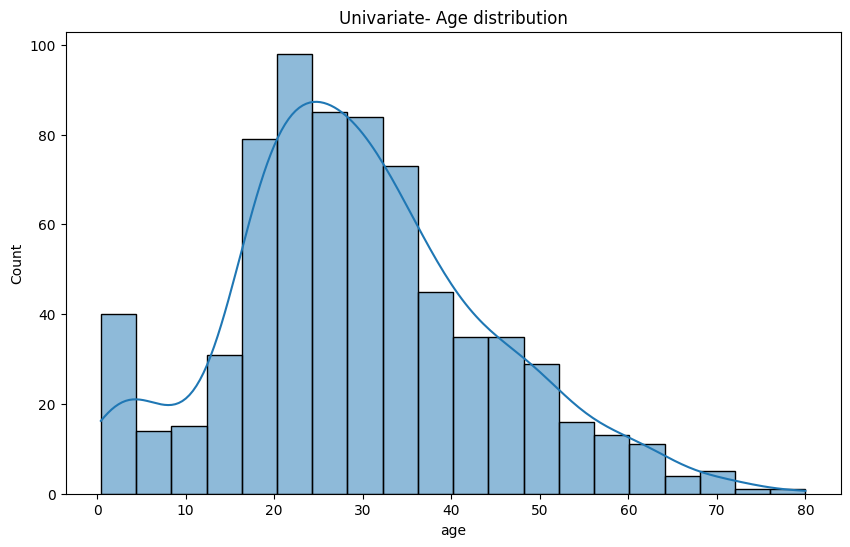

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Univariate- Age distribution')
plt.show()

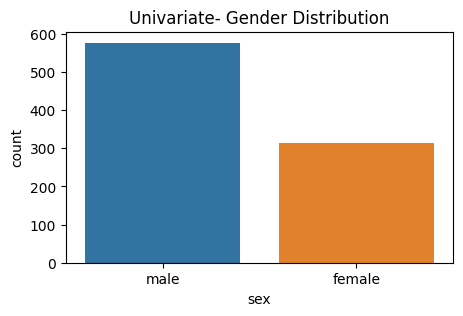

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='sex')
plt.title('Univariate- Gender Distribution')
plt.show()

3. Bivariate

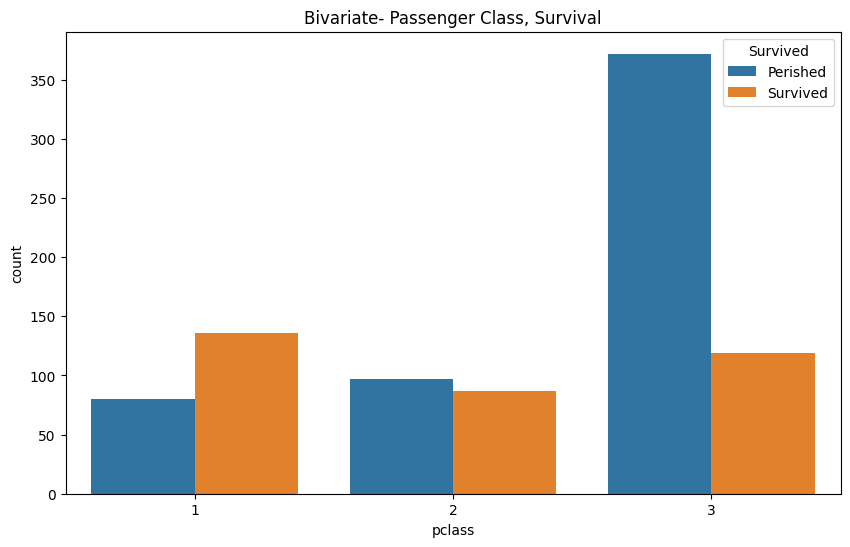

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Bivariate- Passenger Class, Survival')
plt.legend(title='Survived', loc='upper right', labels=['Perished', 'Survived'])
plt.show()

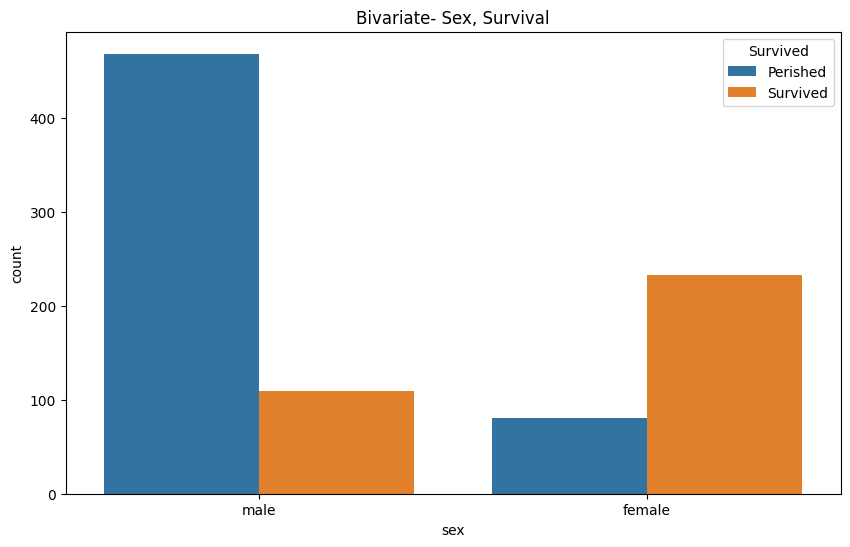

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Bivariate- Sex, Survival')
plt.legend(title='Survived', loc='upper right', labels=['Perished', 'Survived'])
plt.show()

3. Multivariate

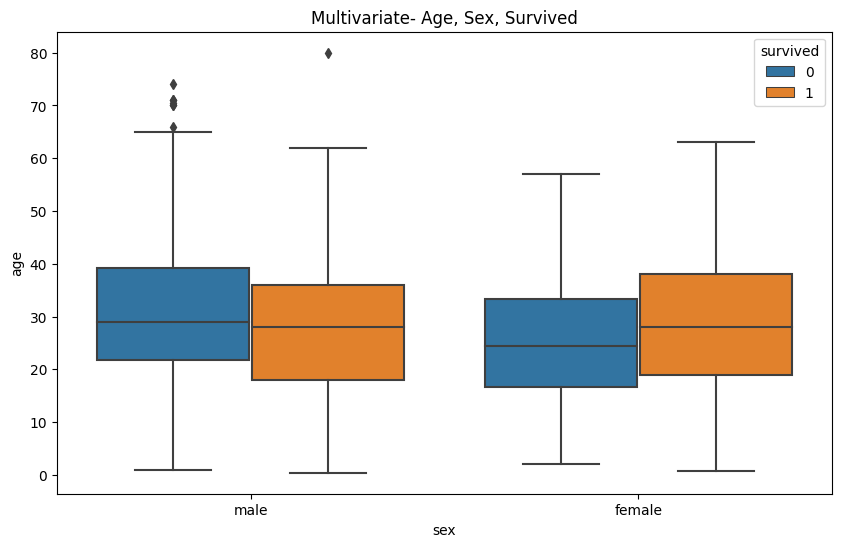

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='age', hue='survived')
plt.title('Multivariate- Age, Sex, Survived')
plt.show()

4.

In [29]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

5.

In [30]:
#checking before changes
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Replacing null values of age with median, embarked with mode, dropping deck since it has very high amount of null values, and dropping the two null values for embark_town

In [31]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df=df.drop(['deck'],axis=1)
df=df.dropna()
#checking after changes
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


6.

In [32]:
#before outlier removal
print(len(df))

889


In [33]:
import numpy as np
def outliers(df, features):
    outindices = []

    for c in features:
        q1= np.percentile(df[c], 25)
        q3= np.percentile(df[c], 75)
        iqr= q3-q1

        outstep= iqr*1.5
        out_list_col= df[(df[c] < q1 - outstep) | (df[c] > q3 + outstep)].index
        outindices.extend(out_list_col)
        
    return outindices

to_drop= outliers(df,["age","sibsp","parch","fare"])
df= df.drop(to_drop, axis = 0).reset_index(drop=True)

In [34]:
#after outlier removal
print(len(df))

577


7.

Transforming all categorical columns like sex, embarked etc.

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['embark_town'] = le.fit_transform(df['embark_town'])
df['alive'] = le.fit_transform(df['alive'])
df['alone'] = le.fit_transform(df['alone'])
df['who'] = le.fit_transform(df['who'])
df['adult_male'] = le.fit_transform(df['adult_male'])
df['class'] = le.fit_transform(df['class'])

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
2,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
3,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
4,0,3,1,28.0,0,0,8.4583,1,2,1,1,1,0,1


8.

The survived and alive columns are the same, and we can drop one if required

In [37]:
X = df.drop('survived', axis=1)
y = df['survived']

In [38]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
2,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
3,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
4,3,1,28.0,0,0,8.4583,1,2,1,1,1,0,1


In [39]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: survived, dtype: int64

9.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X= scaler.fit_transform(X)

In [41]:
display(X)

array([[ 0.67832969,  0.57401488, -0.85476119, ...,  0.54106912,
        -0.65438354, -2.13262208],
       [ 0.67832969, -1.7421151 , -0.38661007, ...,  0.54106912,
         1.52815579,  0.46890633],
       [-2.04917017, -1.7421151 ,  0.66672995, ...,  0.54106912,
         1.52815579, -2.13262208],
       ...,
       [-2.04917017, -1.7421151 , -1.20587453, ...,  0.54106912,
         1.52815579,  0.46890633],
       [-2.04917017,  0.57401488, -0.38661007, ..., -2.24640302,
         1.52815579,  0.46890633],
       [ 0.67832969,  0.57401488,  0.31561661, ..., -0.85266695,
        -0.65438354,  0.46890633]])

10.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)